
Available .txt files in current directory:
[0] ticc_data_20241213_163406.txt

Enter the number of the file you want to analyze: 0

Loading data from ticc_data_20241213_163406.txt...

=== Basic Statistics ===
Number of measurements: 676
Mean: 3.304e-01 seconds
Median: 3.127e-01 seconds
Standard deviation: 4.011e-01 seconds
Min: -6.880e-01 seconds
Max: 9.937e-01 seconds

Measurement rate: 0.98 Hz


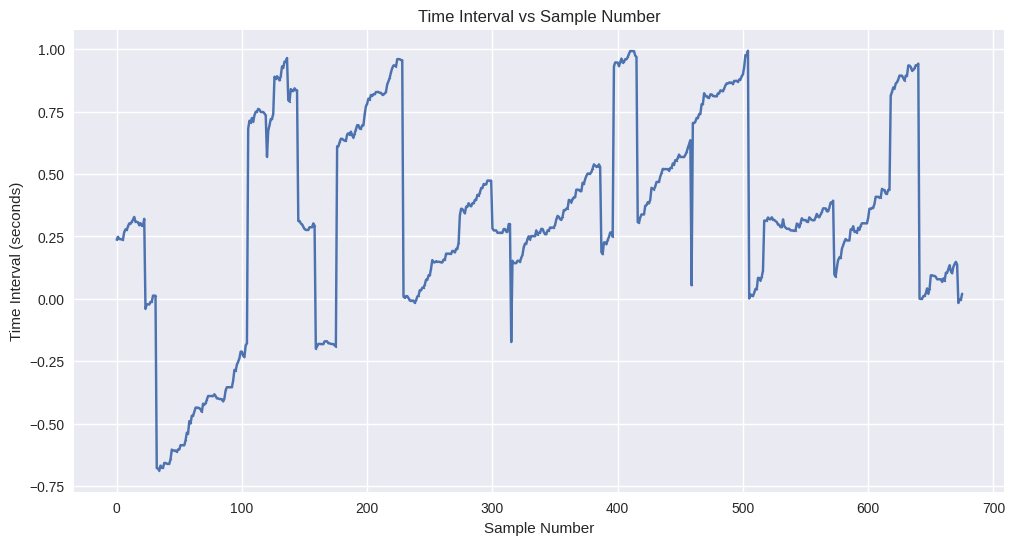

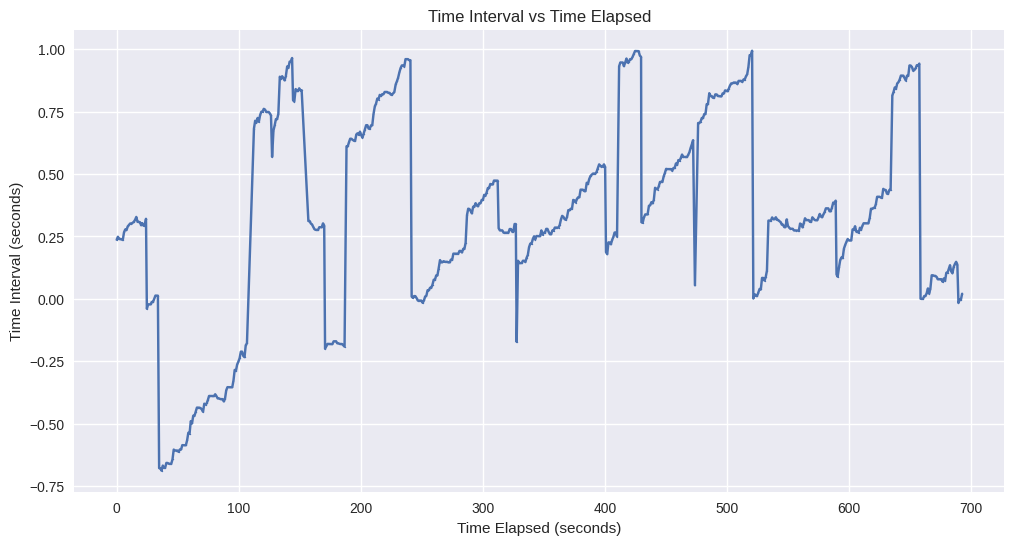

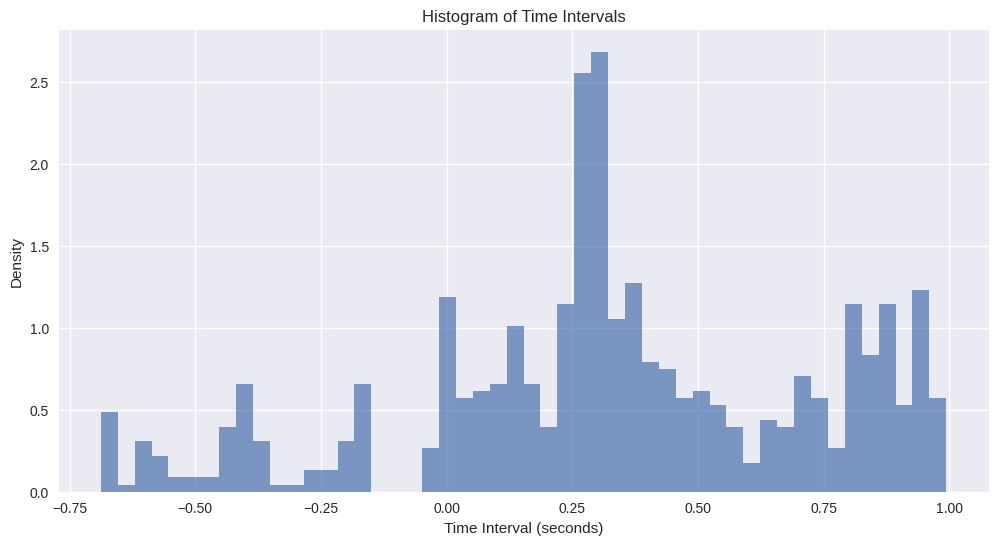

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline
plt.style.use('seaborn')

def load_and_analyze_ticc_data():
    # List files in current directory
    print("\nAvailable .txt files in current directory:")
    txt_files = [f for f in os.listdir('.') if f.endswith('.txt')]
    
    for i, file in enumerate(txt_files):
        print(f"[{i}] {file}")
    
    # Get file selection from user
    while True:
        try:
            selection = int(input("\nEnter the number of the file you want to analyze: "))
            if 0 <= selection < len(txt_files):
                file_path = txt_files[selection]
                break
            else:
                print("Invalid selection. Please try again.")
        except ValueError:
            print("Please enter a valid number.")
    
    # Load data
    print(f"\nLoading data from {file_path}...")
    try:
        # Load data
        data = pd.read_csv(file_path, comment='#')
        timestamps = data.iloc[:, 0].values
        measurements = data.iloc[:, 1].values
        
        # Basic statistics
        print("\n=== Basic Statistics ===")
        print(f"Number of measurements: {len(measurements)}")
        print(f"Mean: {np.mean(measurements):.3e} seconds")
        print(f"Median: {np.median(measurements):.3e} seconds")
        print(f"Standard deviation: {np.std(measurements):.3e} seconds")
        print(f"Min: {np.min(measurements):.3e} seconds")
        print(f"Max: {np.max(measurements):.3e} seconds")
        
        # Calculate measurement rate
        time_span = timestamps[-1] - timestamps[0]
        rate = len(measurements) / time_span
        print(f"\nMeasurement rate: {rate:.2f} Hz")
        
        # Create plots
        # 1. Time Interval vs Sample Number
        plt.figure(figsize=(12, 6))
        plt.plot(range(len(measurements)), measurements, '.-', markersize=2)
        plt.title('Time Interval vs Sample Number')
        plt.xlabel('Sample Number')
        plt.ylabel('Time Interval (seconds)')
        plt.grid(True)
        plt.show()
        
        # 2. Time Interval vs Elapsed Time
        plt.figure(figsize=(12, 6))
        relative_time = timestamps - timestamps[0]  # Time relative to start
        plt.plot(relative_time, measurements, '.-', markersize=2)
        plt.title('Time Interval vs Time Elapsed')
        plt.xlabel('Time Elapsed (seconds)')
        plt.ylabel('Time Interval (seconds)')
        plt.grid(True)
        plt.show()
        
        # 3. Histogram of measurements
        plt.figure(figsize=(12, 6))
        plt.hist(measurements, bins=50, density=True, alpha=0.7)
        plt.title('Histogram of Time Intervals')
        plt.xlabel('Time Interval (seconds)')
        plt.ylabel('Density')
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Error analyzing data: {str(e)}")

if __name__ == "__main__":
    load_and_analyze_ticc_data()


Available .txt files in current directory:
[0] ticc_data_20241213_163406.txt

Enter the number of the file you want to analyze: 0

Loading data from ticc_data_20241213_163406.txt...

=== Basic Statistics ===
Number of measurements: 676
Mean: 3.304e-01 seconds
Median: 3.127e-01 seconds
Standard deviation: 4.011e-01 seconds
Min: -6.880e-01 seconds
Max: 9.937e-01 seconds

Measurement rate: 0.98 Hz


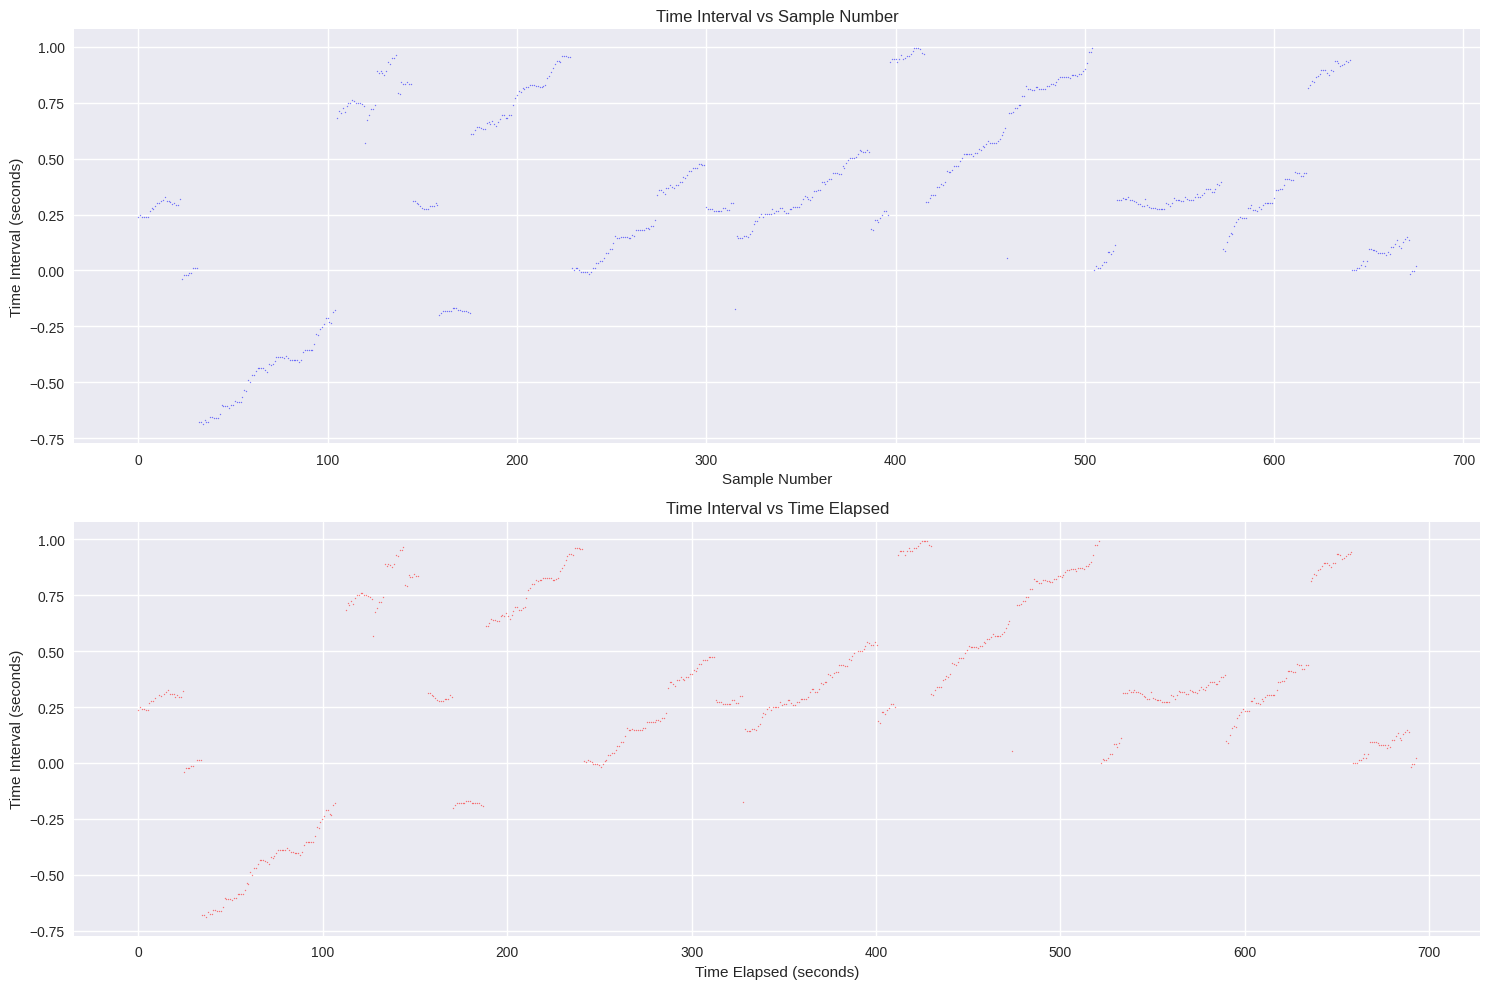

Error analyzing data: inner() got multiple values for argument 'ax'


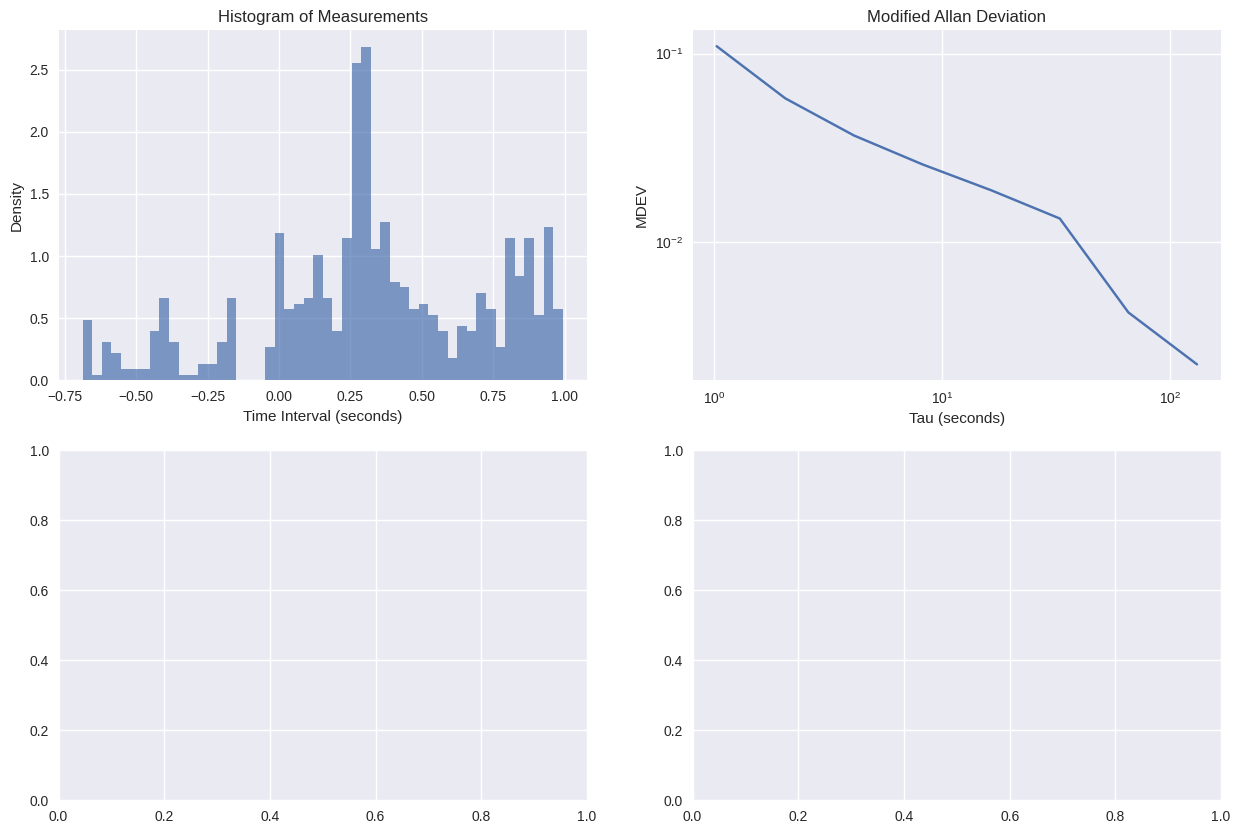

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import allantools
import os
%matplotlib inline
plt.style.use('seaborn')

def load_and_analyze_ticc_data():
    # List files in current directory
    print("\nAvailable .txt files in current directory:")
    txt_files = [f for f in os.listdir('.') if f.endswith('.txt')]
    
    for i, file in enumerate(txt_files):
        print(f"[{i}] {file}")
    
    # Get file selection from user
    while True:
        try:
            selection = int(input("\nEnter the number of the file you want to analyze: "))
            if 0 <= selection < len(txt_files):
                file_path = txt_files[selection]
                break
            else:
                print("Invalid selection. Please try again.")
        except ValueError:
            print("Please enter a valid number.")
    
    # Load data
    print(f"\nLoading data from {file_path}...")
    try:
        data = pd.read_csv(file_path, comment='#')
        timestamps = data.iloc[:, 0].values
        measurements = data.iloc[:, 1].values
        
        # Basic statistics
        print("\n=== Basic Statistics ===")
        print(f"Number of measurements: {len(measurements)}")
        print(f"Mean: {np.mean(measurements):.3e} seconds")
        print(f"Median: {np.median(measurements):.3e} seconds")
        print(f"Standard deviation: {np.std(measurements):.3e} seconds")
        print(f"Min: {np.min(measurements):.3e} seconds")
        print(f"Max: {np.max(measurements):.3e} seconds")
        
        # Calculate measurement rate
        time_span = timestamps[-1] - timestamps[0]
        rate = len(measurements) / time_span
        print(f"\nMeasurement rate: {rate:.2f} Hz")
        
        # Create time difference plots
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
        
        # Plot vs Sample Number
        ax1.plot(range(len(measurements)), measurements, 'b.', alpha=0.5, markersize=2)
        ax1.set_title('Time Interval vs Sample Number')
        ax1.set_xlabel('Sample Number')
        ax1.set_ylabel('Time Interval (seconds)')
        ax1.grid(True)
        
        # Plot vs Unix Time
        relative_time = timestamps - timestamps[0]  # Time relative to start
        ax2.plot(relative_time, measurements, 'r.', alpha=0.5, markersize=2)
        ax2.set_title('Time Interval vs Time Elapsed')
        ax2.set_xlabel('Time Elapsed (seconds)')
        ax2.set_ylabel('Time Interval (seconds)')
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()
        
        # Additional plots
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        
        # Histogram
        ax1.hist(measurements, bins=50, density=True, alpha=0.7)
        ax1.set_title('Histogram of Measurements')
        ax1.set_xlabel('Time Interval (seconds)')
        ax1.set_ylabel('Density')
        ax1.grid(True)
        
        # Calculate and plot Allan deviation
        (taus, adevs, _, _) = allantools.mdev(measurements, rate=rate, data_type="phase")
        
        ax2.loglog(taus, adevs)
        ax2.set_title('Modified Allan Deviation')
        ax2.set_xlabel('Tau (seconds)')
        ax2.set_ylabel('MDEV')
        ax2.grid(True)
        
        # Phase noise plot (simple PSD)
        f, pxx = plt.psd(measurements, Fs=rate, NFFT=8192, ax=ax3)
        ax3.set_title('Power Spectral Density')
        ax3.set_xlabel('Frequency (Hz)')
        ax3.set_ylabel('PSD (s²/Hz)')
        
        # Plot time differences between consecutive measurements
        time_diffs = np.diff(timestamps)
        ax4.plot(time_diffs, '.', alpha=0.5, markersize=2)
        ax4.set_title('Time Between Measurements')
        ax4.set_xlabel('Sample Number')
        ax4.set_ylabel('Time Difference (seconds)')
        ax4.grid(True)
        
        plt.tight_layout()
        plt.show()
        
        # Print Allan Deviation values
        print("\n=== Allan Deviation Values ===")
        print("Tau (s)    MDEV")
        print("-----------------")
        for tau, adev in zip(taus, adevs):
            print(f"{tau:8.2f}  {adev:.2e}")
            
    except Exception as e:
        print(f"Error analyzing data: {str(e)}")

if __name__ == "__main__":
    load_and_analyze_ticc_data()